In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns        
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


In [35]:
db = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")
db

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [36]:
db.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [37]:
db.duplicated().sum()

0

In [38]:
col = db.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [39]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [40]:
db.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [41]:
integer_columns = db.select_dtypes(include='int64').columns
integer_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [42]:
int_db = db[integer_columns].copy()
int_db

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


<Axes: >

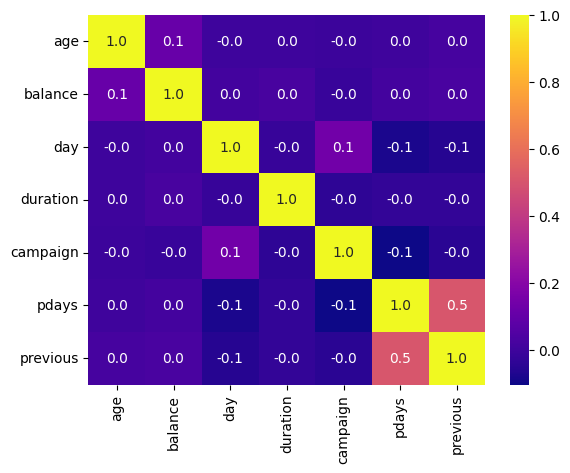

In [43]:
sns.heatmap(int_db.corr(),annot=True,cmap='plasma',fmt='.1f')

In [44]:
unique_job = db["job"].value_counts()
unique_values

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [45]:
unique_job_db = pd.DataFrame({
    'Unique_Values': unique_job.index,
    'Frequency': unique_job.values
})   
unique_job_db

,Unique_Values,Frequency
0,management,2566
1,blue-collar,1944
2,technician,1823
3,admin.,1334
4,services,923
5,retired,778
6,self-employed,405
7,student,360
8,unemployed,357
9,entrepreneur,328


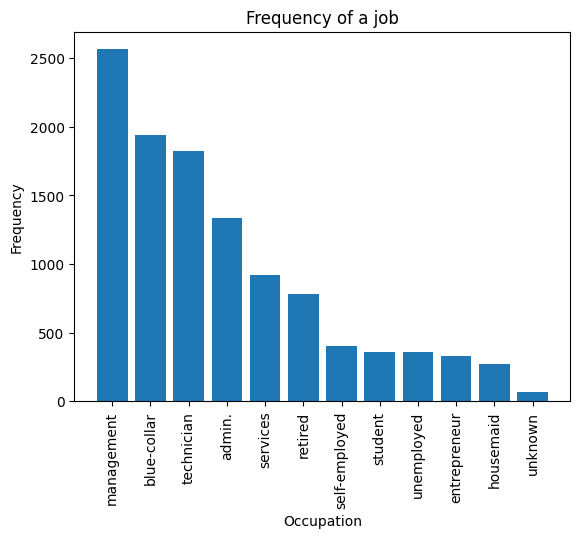

In [46]:
plt.bar(unique_job_db["Unique_Values"], unique_job_db["Frequency"])
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Frequency of a job')
plt.xticks(rotation='vertical')
# Display the chart
plt.show()

In [48]:
edu=db['education'].value_counts().reset_index()
edu

,education,count
0,secondary,5476
1,tertiary,3689
2,primary,1500
3,unknown,497


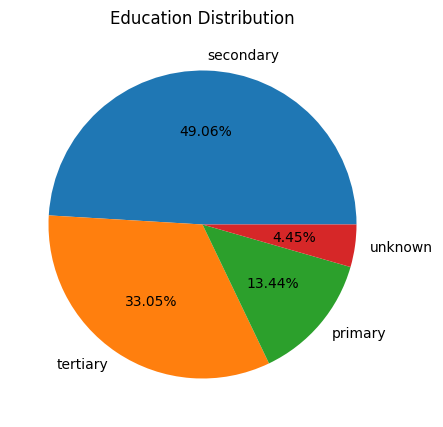

In [50]:
plt.figure(figsize=(7,5))
plt.title('Education Distribution')
plt.pie(edu['count'],labels=edu['education'],autopct='%1.2f%%')
plt.show()

In [51]:
loan=db['loan'].value_counts().reset_index()
loan

,loan,count
0,no,9702
1,yes,1460


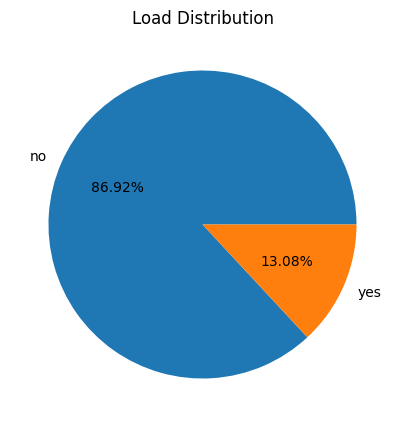

In [53]:
plt.figure(figsize=(7,5))
plt.title('Load Distribution')
plt.pie(loan['count'],labels=loan['loan'],autopct='%1.2f%%')
plt.show()

In [54]:
deposit=db['deposit'].value_counts().reset_index()
deposit

,deposit,count
0,no,5873
1,yes,5289


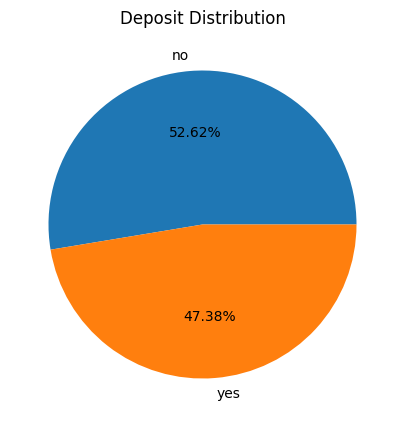

In [55]:
plt.figure(figsize=(7,5))
plt.title('Deposit Distribution')
plt.pie(deposit['count'],labels=deposit['deposit'],autopct='%1.2f%%')
plt.show()

In [56]:
marital=db['marital'].value_counts().reset_index()
marital

,marital,count
0,married,6351
1,single,3518
2,divorced,1293


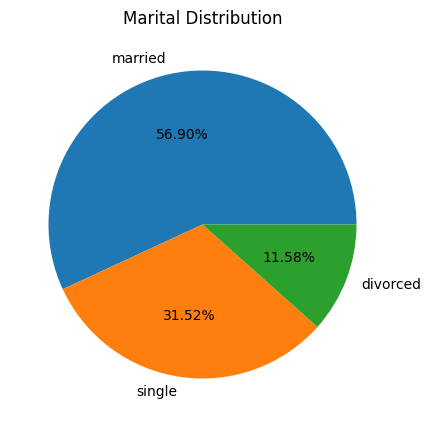

In [57]:
plt.figure(figsize=(7,5))
plt.title('Marital Distribution')
plt.pie(marital['count'],labels=marital['marital'],autopct='%1.2f%%')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


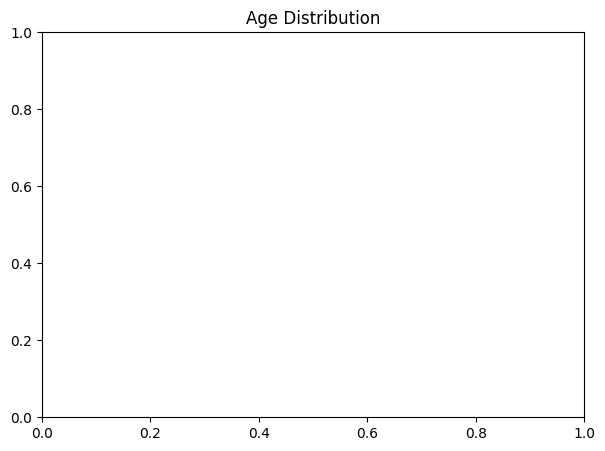

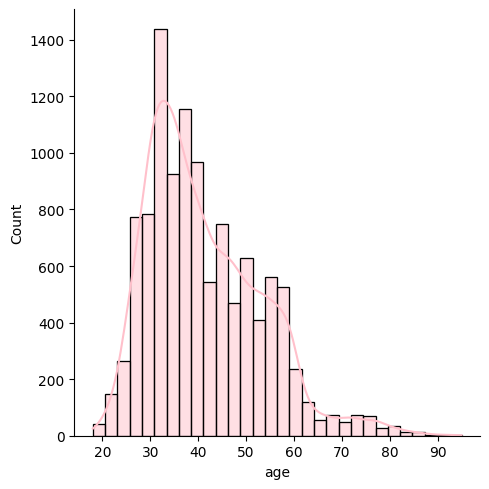

In [64]:
plt.figure(figsize=(7, 5))
plt.title('Age Distribution')
sns.displot(db['age'], kde=True, bins=30, color='pink')
plt.show()

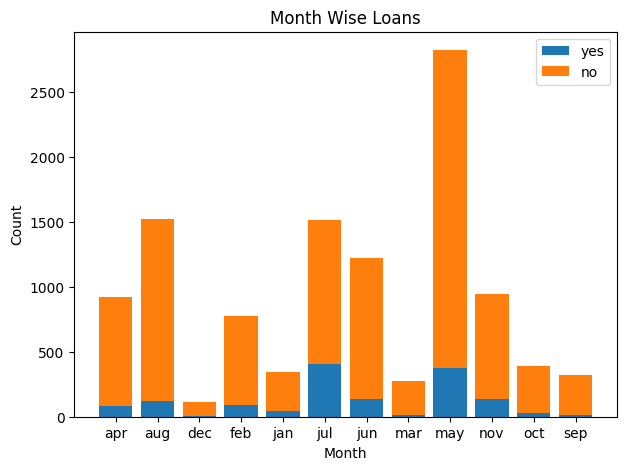

In [68]:
mon_loan=db.groupby(['month','loan']).size().reset_index()
mon_loan.rename(columns={0:'Count'},inplace=True)
mon_loan_yes=mon_loan[mon_loan['loan']=='yes']
mon_loan_no=mon_loan[mon_loan['loan']=='no']
plt.figure(figsize=(7,5))
plt.title('Month Wise Loans')
plt.xlabel('Month')
plt.ylabel('Count')
plt.bar(mon_loan_yes['month'],mon_loan_yes['Count'],label='yes')
plt.bar(mon_loan_no['month'],mon_loan_no['Count'],bottom=mon_loan_yes['Count'],label='no')
plt.legend()
plt.show()

In [69]:
le = LabelEncoder()
for i in col:
    db[i] = le.fit_transform(db[i])

In [71]:
x=db.drop('default',axis=1)
y=db['default']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [78]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [82]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [86]:
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[2166   32]
 [  30    5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2198
           1       0.14      0.14      0.14        35

    accuracy                           0.97      2233
   macro avg       0.56      0.56      0.56      2233
weighted avg       0.97      0.97      0.97      2233

